<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Complete_Simplified_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Selection

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [209]:
data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
df = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]

import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Filter groups
conditioned = df[df['specific_disorder'] == 'Behavioral addiction disorder']
control = df[df['specific_disorder'] == 'Healthy control']
total = pd.concat([conditioned, control])

# Total counts
n_conditioned = len(conditioned)
n_control = len(control)
n_total = len(total)

# Percent women
percent_women_conditioned = (conditioned['sex'] == 'F').mean() * 100
percent_women_control = (control['sex'] == 'F').mean() * 100
percent_women_total = (total['sex'] == 'F').mean() * 100

# Averages
age_avg_conditioned = conditioned['age'].mean()
age_avg_control = control['age'].mean()
age_avg_total = total['age'].mean()

IQ_avg_conditioned = conditioned['IQ'].mean()
IQ_avg_control = control['IQ'].mean()
IQ_avg_total = total['IQ'].mean()

education_avg_conditioned = conditioned['education'].mean()
education_avg_control = control['education'].mean()
education_avg_total = total['education'].mean()

# p-values
p_age = ttest_ind(conditioned['age'], control['age'], equal_var=False).pvalue
p_IQ = ttest_ind(conditioned['IQ'].dropna(), control['IQ'].dropna(), equal_var=False).pvalue
print(p_IQ)
p_edu = ttest_ind(conditioned['education'].dropna(), control['education'].dropna(), equal_var=False).pvalue

# Sex: Chi-square
contingency = pd.crosstab(df['specific_disorder'], df['sex'])
_, p_sex, _, _ = chi2_contingency(contingency)

summary_df = pd.DataFrame({
    'Metric': ['Total participants', 'Average age', 'Percent women', 'Average IQ', 'Average education'],
    'Conditioned': [n_conditioned, age_avg_conditioned, percent_women_conditioned, IQ_avg_conditioned, education_avg_conditioned],
    'Control': [n_control, age_avg_control, percent_women_control, IQ_avg_control, education_avg_control],
    'Total': [n_total, age_avg_total, percent_women_total, IQ_avg_total, education_avg_total],
    'p-value': [None, p_age, p_sex, p_IQ, p_edu]
})



summary_df[['Conditioned', 'Control', 'Total']] = summary_df[['Conditioned', 'Control', 'Total']].round(2)
summary_df['p-value'] = summary_df['p-value'].apply(lambda x: f"{x:.2e}" if pd.notnull(x) else '')


from IPython.display import display

styled_df = summary_df.style \
    .set_table_styles([
        {'selector': 'td, th', 'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]}
    ]) \
    .format(precision=2) \
    .set_properties(**{
        'text-align': 'center'
    }) \
    .set_caption("Group Comparison")

display(styled_df)

print(summary_df)


4.816280155861294e-07


,Metric,Conditioned,Control,Total,p-value
0,Total participants,93.00,95.00,188.00,
1,Average age,25.09,25.72,25.41,4.87e-01
2,Percent women,4.30,36.84,20.74,1.03e-07
3,Average IQ,104.38,116.24,110.47,4.82e-07
4,Average education,13.16,14.91,14.04,9.25e-09


               Metric  Conditioned  Control   Total   p-value
0  Total participants        93.00    95.00  188.00          
1         Average age        25.09    25.72   25.41  4.87e-01
2       Percent women         4.30    36.84   20.74  1.03e-07
3          Average IQ       104.38   116.24  110.47  4.82e-07
4   Average education        13.16    14.91   14.04  9.25e-09


In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]

y = data1['specific_disorder']
X = data1.drop(['no.','specific_disorder', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main_disorder'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf.feature_importances_

feature_index = X_train.columns.get_loc('COH.A.delta.f.F4.k.C4')

# Access the feature importance using the numerical index
feature_importance = rf.feature_importances_[feature_index]

# Print the feature importance
print(feature_importance)

0.026797570366768476


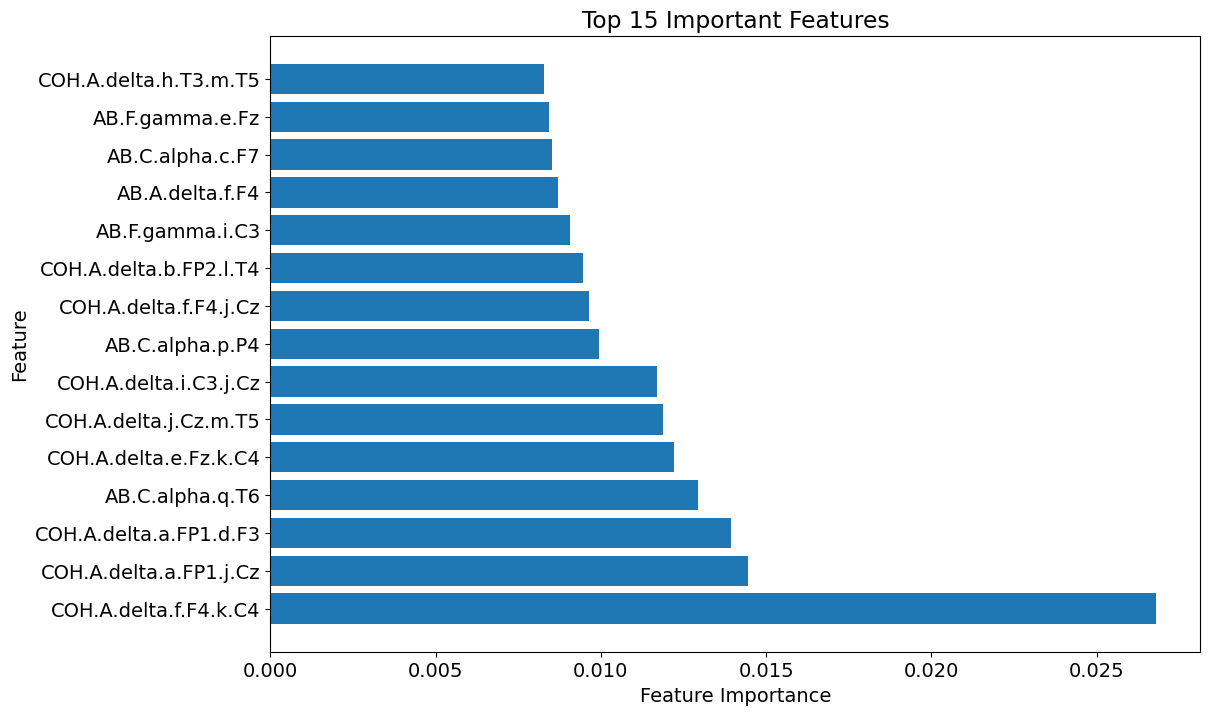

In [211]:
importances = rf.feature_importances_
feature_names = X.columns
copy_feature_names = feature_names

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select the top 15 features
top_15_features = feature_importance_df.head(15)

# Plot the top 15 features
plt.barh(top_15_features['feature'], top_15_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipython-input-212-1383052613.py:60: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')


Optimization terminated successfully.
         Current function value: 0.570510
         Iterations 6


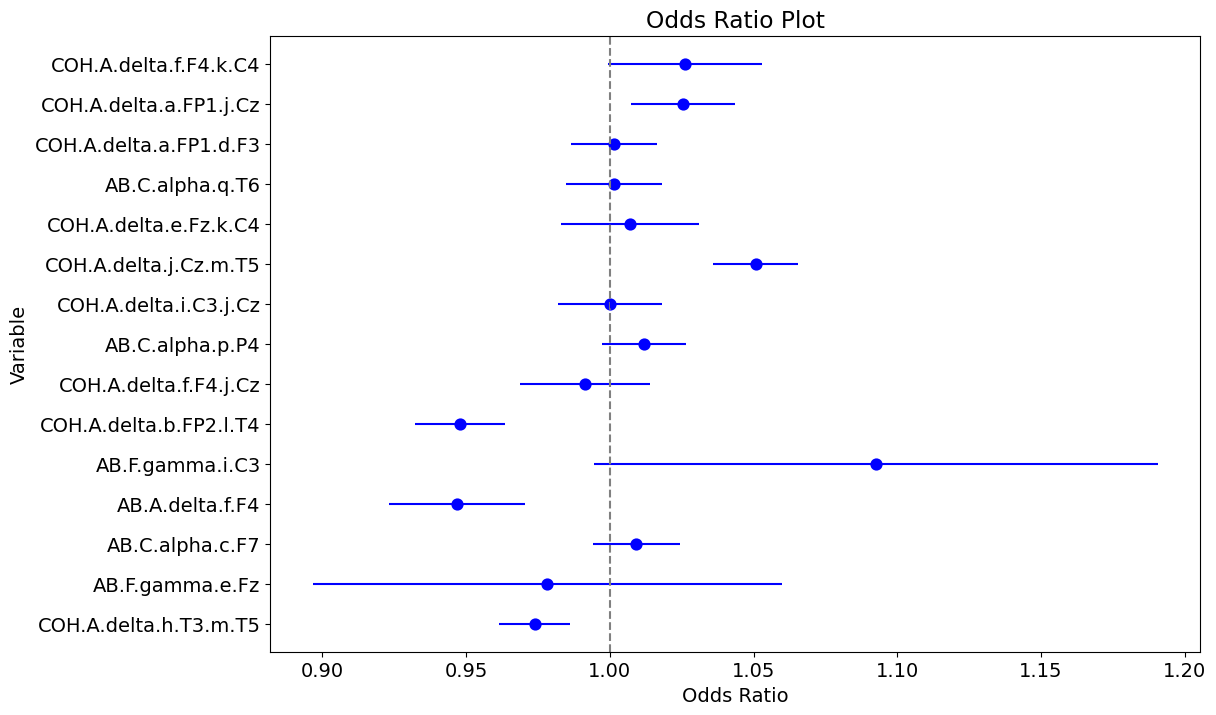

In [212]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/Sheet 1-numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Apply imputation only to the columns specified in 'top_15_features'
data2 = imp_mean.fit_transform(data1[top_15_features['feature']]) # Changed this line
data = pd.DataFrame(data2)


import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create your feature matrix (X) and target vector (y)
feature_names = top_15_features['feature'].tolist()
X = pd.DataFrame(data2, columns=feature_names) #X.columns are original col names before imputation

# Convert 'specific_disorder' to binary (0 or 1)
# Assuming values other than 4 represent 0 and 4 represents 1
y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

import numpy as np

# Get the coefficients
coefficients = model.coef_[0]

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate standard errors (this is the missing part)
# We'll use statsmodels for this as sklearn doesn't directly provide it
import statsmodels.api as sm
X_with_const = sm.add_constant(X)  # Add a constant for the intercept
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()
std_err = result.bse.values[1:]  # Get standard errors for the features, excluding intercept


import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound

fig, ax = plt.subplots()

sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')

ax.errorbar(
    x=df['Odds Ratio'],
    y=df['Variable'],
    xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']],
    fmt='|',
    color='blue'
)

plt.axvline(1, linestyle='--', color='gray')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()


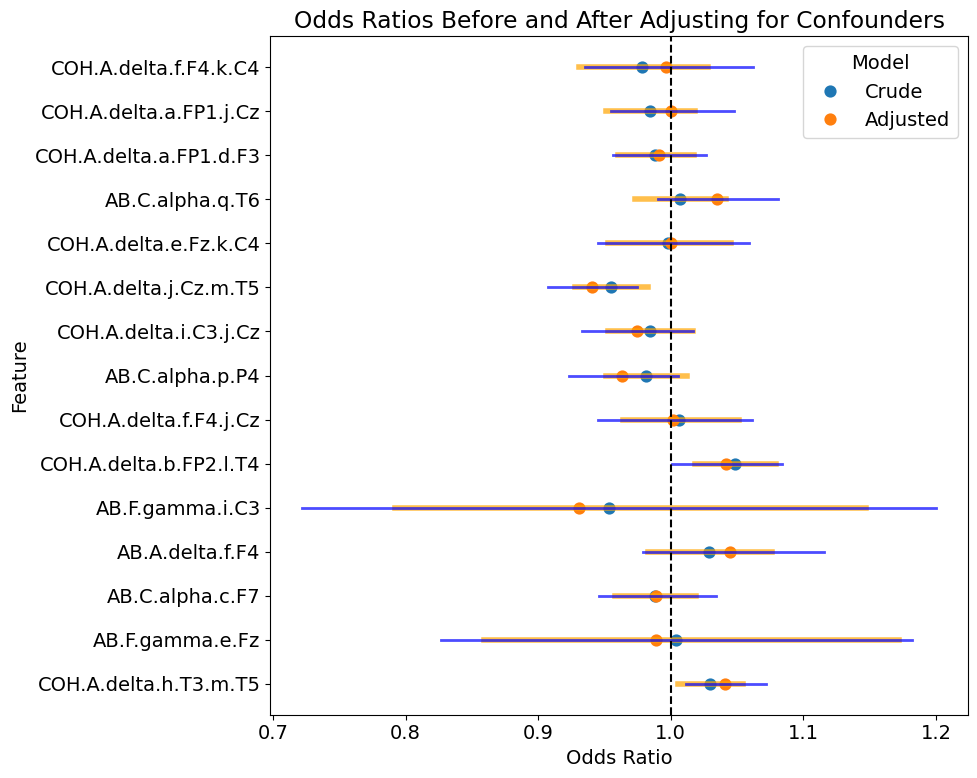

In [220]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Read data

data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]
data1['sex'] = data1['sex'].replace({'M': 1, 'F': 2})

confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)

# Define target variable
y = data1['specific_disorder'].apply(lambda x: 1 if x == "Behavioral addiction disorder" else 0)
y = y.reset_index(drop=True)

# Define features and confounders
feature_names = top_15_features['feature'].tolist()
confounders = ['age', 'sex', 'IQ', 'education']
all_features = feature_names + confounders

# Impute missing values for all features
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(data1[all_features])
X_all = pd.DataFrame(data2, columns=all_features)

# Split into crude and adjusted feature sets
X_crude = X_all[feature_names]
X_adjusted = X_all[all_features]

# --- Crude model ---
Xc = sm.add_constant(X_crude)
model_crude = sm.Logit(y, Xc).fit(disp=0)
or_crude = np.exp(model_crude.params[1:])  # exclude intercept
ci_crude = model_crude.conf_int().iloc[1:]  # exclude intercept
ci_crude = np.exp(ci_crude)

# --- Adjusted model ---
Xa = sm.add_constant(X_adjusted)
model_adj = sm.Logit(y, Xa).fit(disp=0)
or_adj = np.exp(model_adj.params[1:])  # exclude intercept
ci_adj = model_adj.conf_int().iloc[1:]  # exclude intercept
ci_adj = np.exp(ci_adj)

# --- Prepare DataFrame for plotting ---
def create_df(odds_ratios, ci, label):
    return pd.DataFrame({
        'Variable': odds_ratios.index,
        'Odds Ratio': odds_ratios.values,
        'Lower Bound': ci[0].values,
        'Upper Bound': ci[1].values,
        'Model': label
    })

df_crude = create_df(or_crude, ci_crude, 'Crude')
df_adj = create_df(or_adj.loc[feature_names], ci_adj.loc[feature_names], 'Adjusted')  # filter for the 15

# Combine and plot
df_plot = pd.concat([df_crude, df_adj], axis=0)

plt.figure(figsize=(10, 8))
sns.pointplot(data=df_plot, x='Odds Ratio', y='Variable', hue='Model', join=False)

# Add error bars
for i, row in df_plot.iterrows():
    plt.plot(
    [row['Lower Bound'], row['Upper Bound']],
    [row['Variable'], row['Variable']],
    color='orange' if row['Model'] == 'Crude' else 'blue',
    linewidth=4 if row['Model'] == 'Crude' else 2,  # Crude lines are thicker
    alpha=0.7
)


plt.axvline(1, linestyle='--', color='black')
plt.title('Odds Ratios Before and After Adjusting for Confounders')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [223]:
# Extract adjusted odds ratios, confidence intervals, and p-values
adjusted_odds_ratios = np.exp(model_adj.params[1:])  # exclude intercept
conf_int_adj = np.exp(model_adj.conf_int().iloc[1:])  # exclude intercept
p_values_adj = model_adj.pvalues.iloc[1:]  # exclude intercept

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Variable': adjusted_odds_ratios.index,
    'Adjusted Odds Ratio': adjusted_odds_ratios.values,
    'Lower 95% CI': conf_int_adj[0].values,
    'Upper 95% CI': conf_int_adj[1].values,
    'p-value': p_values_adj.values,
    'Statistically Significant (p < 0.05)': p_values_adj.values < 0.05
})

# Filter to top_15 features only (optional)
summary_df = summary_df[summary_df['Variable'].isin(feature_names)]

# Apply styling
styled_df = summary_df.style \
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('border', '1px solid black'),
                ('border-collapse', 'collapse'),
                ('background-color', '#f9f9f9')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('border', '1px solid black'),
                ('border-collapse', 'collapse')
            ]
        }
    ]) \
    .format(precision=2) \
    .set_properties(**{
        'text-align': 'center',
        'padding': '6px'
    }) \
    .set_caption("Adjusted Odds Ratios and Statistical Significance")

# Display in notebook (Jupyter/Colab)
styled_df



,Variable,Adjusted Odds Ratio,Lower 95% CI,Upper 95% CI,p-value,Statistically Significant (p < 0.05)
0,COH.A.delta.f.F4.k.C4,1.00,0.94,1.06,0.92,False
1,COH.A.delta.a.FP1.j.Cz,1.00,0.95,1.05,1.00,False
2,COH.A.delta.a.FP1.d.F3,0.99,0.96,1.03,0.61,False
3,AB.C.alpha.q.T6,1.03,0.99,1.08,0.13,False
4,COH.A.delta.e.Fz.k.C4,1.00,0.94,1.06,0.99,False
5,COH.A.delta.j.Cz.m.T5,0.94,0.91,0.97,0.00,True
6,COH.A.delta.i.C3.j.Cz,0.97,0.93,1.02,0.23,False
7,AB.C.alpha.p.P4,0.96,0.92,1.01,0.09,False
8,COH.A.delta.f.F4.j.Cz,1.00,0.95,1.06,0.96,False
9,COH.A.delta.b.FP2.l.T4,1.04,1.00,1.08,0.04,True


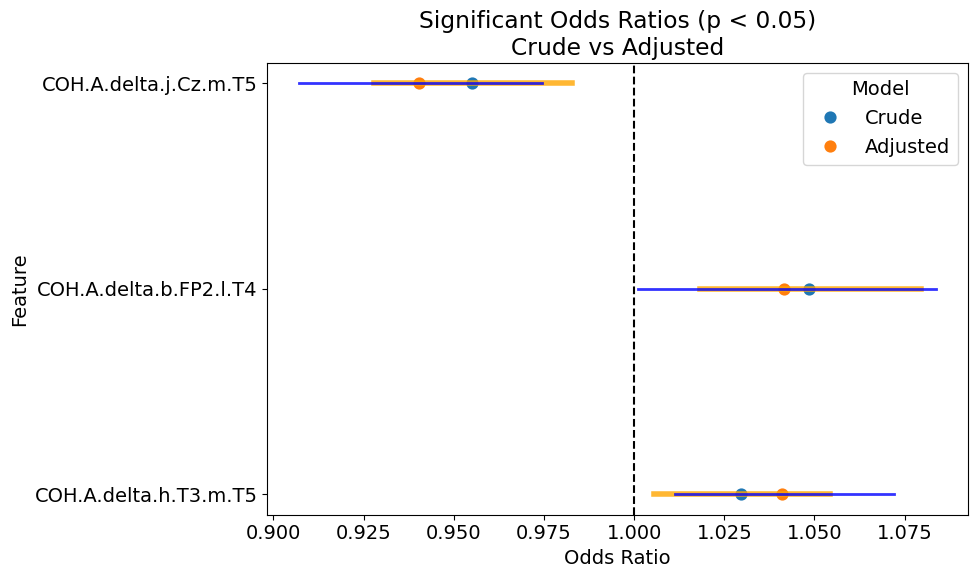

In [224]:
# Step 1: Filter significant features (based on adjusted model)
significant_vars = summary_df[summary_df['Statistically Significant (p < 0.05)']]['Variable'].tolist()

# Step 2: Filter the crude and adjusted results
df_crude_sig = df_crude[df_crude['Variable'].isin(significant_vars)]
df_adj_sig = df_adj[df_adj['Variable'].isin(significant_vars)]

# Step 3: Combine for plotting
df_plot_sig = pd.concat([df_crude_sig, df_adj_sig], axis=0)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_plot_sig, x='Odds Ratio', y='Variable', hue='Model', join=False)

# Add error bars manually
for _, row in df_plot_sig.iterrows():
    plt.plot(
        [row['Lower Bound'], row['Upper Bound']],
        [row['Variable'], row['Variable']],
        color='orange' if row['Model'] == 'Crude' else 'blue',
        linewidth=4 if row['Model'] == 'Crude' else 2,
        alpha=0.8
    )

plt.axvline(1, linestyle='--', color='black')
plt.title('Significant Odds Ratios (p < 0.05)\nCrude vs Adjusted')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [225]:
import pandas as pd

p_values = result.pvalues.values[1:]

# Create the DataFrame including p-values
df = pd.DataFrame({
    'Variable': feature_names,
    'Odds Ratio': odds_ratios,
    'p-value': p_values
})

# Add a column for significance
df['Significant (p < 0.05)'] = df['p-value'] < 0.05

# Filter to keep only significant rows
#df = df[df['Significant (p < 0.05)']]

# Round values
df = df.round(2)


from IPython.display import display

styled_df = df.style \
    .set_table_styles([
        {
            'selector': 'th',
            'props': [('border', '1px solid black'), ('border-collapse', 'collapse'), ('background-color', '#f9f9f9')]
        },
        {
            'selector': 'td',
            'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]
        }
    ]) \
    .format(precision=2) \
    .set_properties(**{
        'text-align': 'center',
        'padding': '6px'
    }) \
    .set_caption("Significant Odds Ratios")

display(styled_df)

print(styled_df)

,Variable,Odds Ratio,p-value,Significant (p < 0.05)
0,COH.A.delta.f.F4.k.C4,1.03,0.32,False
1,COH.A.delta.a.FP1.j.Cz,1.03,0.24,False
2,COH.A.delta.a.FP1.d.F3,1.00,0.56,False
3,AB.C.alpha.q.T6,1.00,0.93,False
4,COH.A.delta.e.Fz.k.C4,1.01,0.67,False
5,COH.A.delta.j.Cz.m.T5,1.05,0.00,True
6,COH.A.delta.i.C3.j.Cz,1.00,0.39,False
7,AB.C.alpha.p.P4,1.01,0.43,False
8,COH.A.delta.f.F4.j.Cz,0.99,0.70,False
9,COH.A.delta.b.FP2.l.T4,0.95,0.00,True


## Muse Integration

In [ ]:
user_data = pd.read_csv('/content/Anna mindMonitor_2025-01-18--11-37-00.csv')
data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]

In [ ]:
#Delta AF8-TP9 coherence - corresponds to COH.A.delta.f.F4.h.T3

from scipy import signal

data = pd.read_csv('/content/Anna mindMonitor_2025-01-18--11-37-00.csv')

channel_1 = data['Delta_AF8'].values
channel_2 = data['Delta_TP10'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF8DeltaTP10': Cxy})

coherence_AF8_TP10 = coherence_data['Coherence DeltaAF8DeltaTP10'].mean()
coherence_AF8_TP10 *=100
print(coherence_AF8_TP10)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Convert 'sex' to numeric
data1['sex'] = data1['sex'].replace({'male': 1, 'female': 2})

confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)

focus_var = ['COH.A.delta.j.Cz.m.T5']

# Prepare target variable (binary)
Y = data1['specific_disorder'].apply(lambda x: 1 if x == 'Behavioral addiction disorder' else 0).astype(float)

# Prepare features dataframe
X = data1[focus_var + confounders]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

X_with_const = sm.add_constant(X)

logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()


Delta_TP9 = user_data['Delta_TP9'].values
Delta_TP9 = np.nan_to_num(Delta_TP9, nan=np.nanmean(Delta_TP9))
Delta_TP9_mean = Delta_TP9.mean()

prediction_data = pd.DataFrame(columns=X_with_const.columns)
prediction_data.loc[0] = 0  # initialize all zeros

prediction_data.at[0, 'const'] = 1

prediction_data.at[0, 'COH.A.delta.j.Cz.m.T5'] = Delta_TP9_mean


for confounder in confounders:
    if confounder in prediction_data.columns:
        prediction_data.at[0, confounder] = data1[confounder].mean()

pred = result.get_prediction(prediction_data)

print(pred.predicted)

risk1 = pred.predicted


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data1['sex'] = data1['sex'].replace({'male': 1, 'female': 2})
confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)
focus_var = ['COH.A.delta.b.FP2.l.T4']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 'Behavioral addiction disorder' else 0).astype(float)

X = data1[focus_var + confounders]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

X_with_const = sm.add_constant(X)

logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

AF8_TP10 = coherence_AF8_TP10
AF8_TP10 = np.nan_to_num(AF8_TP10, nan=np.nanmean(AF8_TP10))
AF8_TP10_mean = AF8_TP10.mean()

prediction_data = pd.DataFrame(columns=X_with_const.columns)
prediction_data.loc[0] = 0

prediction_data.at[0, 'const'] = 1
prediction_data.at[0, 'COH.A.delta.b.FP2.l.T4'] = AF8_TP10_mean

for confounder in confounders:
    if confounder in prediction_data.columns:
        prediction_data.at[0, confounder] = data1[confounder].mean()

pred = result.get_prediction(prediction_data)

print(pred.predicted)

risk2 = pred.predicted


In [ ]:
if risk2 < 0.5:
  risk2 = -1*(0.5 - risk2)

if risk1 < 0.5:
  risk1 = -1*(0.5 - risk1)

if risk2 > 0.5:
  risk2 = (risk2-0.5)
if risk1 > 0.5:
  risk1 = (risk1-0.5)


risk_total = risk2 + risk1

if risk_total<0:
  print("You are " + str(risk_total*-100) +"% less likely to have IAD")
if risk_total>0:
  print("You are " + str(risk_total*100) +"% more likely to have IAD")
if risk_total==0:
  print("Prediction cannot be made.")